# Lab. 8 - K-Means and the LLoid algorithm Moses Mbabaali 4846019 

In this lab we consider unsupervised settings, and more specifically the problem of data clustering using K-means.

As usual, we start including libraries and utility functions.

In [1]:
# import libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import os
import numpy.linalg as la

In [2]:
def mixGauss(means, sigmas, n):

    means = np.array(means)
    sigmas = np.array(sigmas)

    d = means.shape[1]
    num_classes = sigmas.size
    data = np.full((n * num_classes, d), np.inf)
    labels = np.zeros(n * num_classes)

    for idx, sigma in enumerate(sigmas):
        data[idx * n:(idx + 1) * n] = np.random.multivariate_normal(mean=means[idx], cov=np.eye(d) * sigmas[idx] ** 2,
                                                                    size=n)
        labels[idx * n:(idx + 1) * n] = idx 
        
    if(num_classes == 2):
        labels[labels==0] = -1

    return data, labels

In [3]:
def EuclidDistance(P1,P2):
    v = np.linalg.norm(P1-P2,2)
    return v**2

In [4]:
def allDistances(X1, X2):
    D = np.zeros((X1.shape[0], X2.shape[0]))
    for idx1 in range(np.shape(X1)[0]):
        for idx2 in range(np.shape(X2)[0]):
            D[idx1,idx2] = EuclidDistance(X1[idx1,:],X2[idx2,:])
    return D

##### The Lloid algorithm

We now focus on the implementation of the LLoid algorithm. The arguments of the function are:
- X: the data matrix
- centers0: the initialization of the cluster centers
- maxiter: the maximum number of iterations
The function returns the final clusters centers and the labels associated with each point.


In [5]:

def Lloid(X, centers, maxiter):
    
    # random centers
    n, dim = np.shape(X)
    rand_center = np.random.choice(n,centers,replace=False) # Gets random numbers for indexes
    centroids = [X[index] for index in rand_center] # Creates a list of initial index points from dataset 
    
    
    print("Original centers ")
    print(centroids)
    
    idx_prev = np.zeros((len(centroids),X.shape[1])) # 1xn vector storing cluster assignments
    
    for i in np.arange(maxiter):
        # Compute Squared Euclidean distance (i.e. the squared distance)
        # between each cluster centre and each observation
        # Assign data to clusters: for each point, find the minimum distance and the associated center
        clusters = [[] for j in range(len(centroids))]
        
        cluster_obs= [[] for j in range (len(centroids))]   
        
        for index, observation, in enumerate(X):
            centroid_index = near_centroid(observation,centroids)
            clusters[centroid_index].append(index)
            cluster_obs[centroid_index].append(observation)
                
            ## Update cluster center
            old_centroids = centroids
            centroids= new_centroids(clusters,X)
            
        
            # Uncomment this part to view the centroids update graphically. Its usually slow. 
            for i, index in enumerate(clusters):
                p = X[index].T
                plt.scatter(*p)
                
            for i in centroids:
                plt.scatter(*i, marker="x", color='black', linewidth=2)     
           
            # Check if clusters have not changed
            distances = [EuclidDistance(old_centroids[i],centroids[i]) for i in range(len(centroids))]
            if sum (distances) == 0: 
                break          
         
        
        Iv = cluster_obs
        #Iv, centroids         
    print ("Final Centroids")
    print (centroids)
        
    return centroids, clusters


def near_centroid(observation, centroids):
    distances = [EuclidDistance(observation,point) for point in centroids]
    nearest_idx = np.argmin(distances)
    return nearest_idx 

def new_centroids(clusters,X):
    centroids = np.zeros((len(clusters),X.shape[1]))
    for idx, i in enumerate(clusters):
        mean_cluster = np.mean(X[i],axis=0)
        centroids[idx] = mean_cluster
    return centroids

Original centers 
[array([-0.07496049,  1.05571323]), array([-0.24249651,  1.06459367]), array([1.47675248, 1.50687162]), array([1.07968937, 1.07066599]), array([0.58719065, 1.33540513])]
Final Centroids
[[ 0.17068252 -0.17889606]
 [ 0.14806265  0.87970618]
 [-0.09299377  0.11541968]
 [ 0.96904218  0.45520222]
 [-0.34758059  0.05043715]]


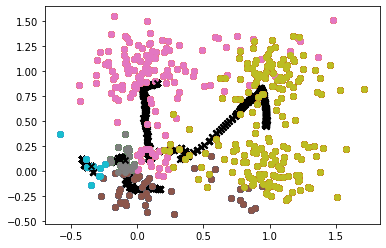

In [63]:
data = Lloid(X, 5, 3)

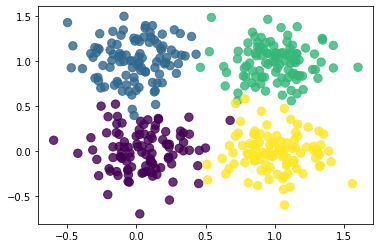

In [6]:
# Build a dataset with at least 4 classes and plot it
X, Y = mixGauss([[0,0], [0,1], [1,1], [1,0]], [0.2, 0.2, 0.2, 0.2], 100)
plt.scatter(X[:,0], X[:,1], s=70, c=Y, alpha=0.8)

In [7]:
Y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2.

Original centers 
[array([0.1018785 , 1.21675579]), array([0.90895089, 0.92119705]), array([0.80057532, 0.13178854]), array([0.14103832, 0.00686419])]
Final Centroids
[[ 0.04618644  0.80934585]
 [-0.18513898  0.00587393]
 [ 1.03775511  0.74457305]
 [ 0.66067263 -0.09314104]]
4


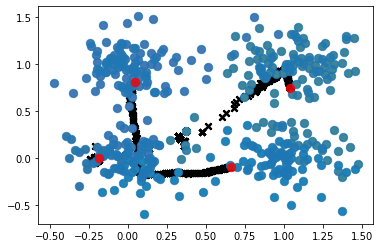

In [65]:
# Try with a random initialization of the centers.
# NOTE: TRY MULTIPLE TIMES!
import random 



k = np.shape(X)[0] # ... fill here ...   k = np.shape(centers)[0]
dim = np.shape(X)[1]
centers0 =  random.randint(2,10)

# Call the Lloid function
centers = Lloid(X,centers0 , 4)
# Call the Lloid function
#centers = Lloid(X,centers0 , 5)

Clusters = []
for i, index in enumerate(centers[1]):
    p = X[index].T
    Clusters.append(p)

# Visualize the final clusters and their centroids
plt.scatter(X[:,0], X[:,1], s=70, alpha=0.8)
plt.scatter(centers[0][:,0], centers[0][:,1], s=70, c='r', alpha=0.8)

print (centers0)

##### K-Means++

We now consider a better strategy to initialize the centers of the clusters, i.e. selecting points with maximum distance among them. Have a look to the following function.

In [66]:
def kMeanspp(X,k):

    n, d = np.shape(X)

    IdxC = np.random.permutation(np.shape(X)[0])
    
    centers = np.zeros((k,d))

    centers[0,:] = X[IdxC[0],:]

    for i in np.arange(1,k):
        
        D = allDistances(centers[:i,:], X)
        idx = np.argmin(D,axis=0)
        Ds = np.min(D,axis=0)

        D2 = Ds**2
        P = np.divide(D2, np.sum(D2))
        
        newcpos = np.argmax(P)
        centers[i,:] = X[newcpos,:]
        
    return centers

In [67]:
def Lloid2(X, centers, maxiter):
    
    # random centers
    n, dim = np.shape(X)
    rand_center = np.random.choice(n,centers,replace=False) # Gets random numbers for indexes
    centroids = [kMeanspp(X,centers)] # Creates a list of initial index points from dataset 
    
    
    print("Original centers ")
    print(centroids)
    
    idx_prev = np.zeros((len(centroids),X.shape[1])) # 1xn vector storing cluster assignments
    
    for i in np.arange(maxiter):
        # Compute Squared Euclidean distance (i.e. the squared distance)
        # between each cluster centre and each observation
        # Assign data to clusters: for each point, find the minimum distance and the associated center
        clusters = [[] for j in range(len(centroids))]
        
        cluster_obs= [[] for j in range (len(centroids))]   
        
        for index, observation, in enumerate(X):
            centroid_index = near_centroid(observation,centroids)
            clusters[centroid_index].append(index)
            cluster_obs[centroid_index].append(observation)
                
            ## Update cluster center
            old_centroids = centroids
            centroids= new_centroids(clusters,X)
            
            #idx_prev[centroid_index] = centroids
            
            # Check if clusters have not changed
            distances = [EuclidDistance(old_centroids[i],centroids[i]) for i in range(len(centroids))] 
            if sum (distances) == 0:
                break            
        
        Iv = cluster_obs
        #Iv, centroids         
        
    return centroids


Original centers 
[array([[ 1.13766666,  1.22053898],
       [-0.31139996, -0.29857228],
       [ 1.37326828, -0.56219742],
       [-0.23998833,  1.22277657]])]


array([[0.51960712, 0.4950818 ]])

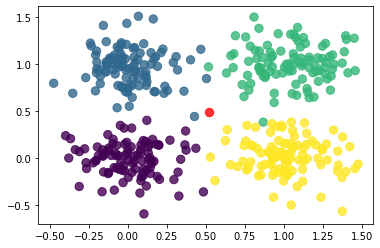

In [68]:
# Try and use K-Means++ for initialization
k = 4
centers0 =  kMeanspp(X,k)

# Call the Lloid function
centers2 = Lloid2(X, k, 8)

# Visualize the final clusters and their centroids
plt.scatter(X[:,0], X[:,1], s=70, c=Y  ,alpha=0.8)
plt.scatter(centers2[:,0], centers2[:,1], s=70, c='r', alpha=0.8)

centers2